## U Food Marketing Analysis

In [54]:
import pandas as pd
import seaborn as sns


In [163]:
food = pd.read_csv(r"/Users/koapam/Desktop/Coding_Workspace/Python_Workspace/files_folder/projects/u_food_marketing.csv")
food

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [46]:
# pd.set_option('display.max.rows', 2300)
# pd.set_option('display.max.columns', 50)
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

### Check for duplicates

In [169]:
food.info()
# food[food.duplicated()].shape
food[food.duplicated()].sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Income                  9366769.0
Kidhome                      79.0
Teenhome                     87.0
Recency                    9277.0
MntWines                  55672.0
MntFruits                  4936.0
MntMeatProducts           28906.0
MntFishProducts            7256.0
MntSweetProducts           4708.0
MntGoldProds               8380.0
NumDealsPurchases           403.0
NumWebPurchases             725.0
NumCatalogPurchases         488.0
NumStorePurchases          1104.0
NumWebVisitsMonth           975.0
AcceptedCmp3                 12.0
AcceptedCmp4                  9.0
AcceptedCmp5                 15.0
AcceptedCmp1                  9.0
AcceptedCmp2                  4.0
Complain                      1.0
Z_CostContact               552.0
Z_Revenue                  2024.0
Response                     22.0
Age                        9358.0
Customer_Days            464574.0
marital_Divorced             16.0
marital_Married              69.0
marital_Single               34.0
marital_Togeth

In [91]:
food.drop_duplicates(keep = False, inplace = True)

In [92]:
food['Total_Children'] = food[['Kidhome','Teenhome']].sum(axis=1)

### Data Cleaning

In [93]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

food['Marital_Status'] = food[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']].sum(axis=1)
food['Marital_Status_str'] = food['Marital_Status'].map({5: 'Divorced', 4: 'Married',3:'Single',2: 'Together',1:'Widow'})


food[food['Marital_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,0,3,Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,2,3,Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,0,2,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,1,2,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,1,4,Married


In [148]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

food['Education_Status'] = food [['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].sum(axis=1)
food['Education_Status_str'] = food['Education_Status'].map({1: '2n Cycle', 2: 'Basic', 3: 'Graduation', 4: 'Master', 5: 'PhD'})


food[food['Education_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Accepted_Campaigns,Age_Group,Education_Status_str
0,58138.0,0,0,58,635,88,546,172,88,88,...,1529,1441,0,0,3,Single,3,1,61 - 70,Graduation
1,46344.0,1,1,38,11,1,6,2,1,6,...,21,15,0,2,3,Single,3,0,61 - 70,Graduation
2,71613.0,0,0,26,426,49,127,111,21,42,...,734,692,0,0,2,Together,3,0,51 - 60,Graduation
3,26646.0,1,0,26,11,4,20,10,3,5,...,48,43,0,1,2,Together,3,0,31 - 40,Graduation
4,58293.0,1,0,94,173,43,118,46,27,15,...,407,392,0,1,4,Married,5,0,31 - 40,PhD


In [146]:
food['Accepted_Campaigns'] = food[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','AcceptedCmp1', 'Response']].sum(axis=1)
food['Accepted_Campaigns']  = (food['Accepted_Campaigns'] != 0).astype(int)

food[food['Accepted_Campaigns'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1529,1441,0,0,3,Single,3,1,61 - 70
8,30351.0,1,0,19,14,0,24,3,3,2,...,5,44,42,0,1,2,Together,5,1,41 - 50
9,5648.0,1,1,68,28,0,6,1,1,13,...,5,36,23,1,2,2,Together,5,1,61 - 70
17,76995.0,0,1,91,1012,80,498,0,16,176,...,0,1606,1430,1,1,4,Married,4,1,71 - 85
21,58607.0,0,1,63,867,0,86,0,0,19,...,5,953,934,1,1,4,Married,5,1,71 - 85


In [96]:
food.corr(method ='pearson', numeric_only=True)['Accepted_Campaigns'].sort_values(ascending=False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.713352
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.416651
MntTotal                0.393910
MntRegularProds         0.391931
NumCatalogPurchases     0.322143
MntMeatProducts         0.298240
Income                  0.292812
NumWebPurchases         0.221217
MntGoldProds            0.188209
AcceptedCmp2            0.174619
MntSweetProducts        0.156430
MntFruits               0.149973
MntFishProducts         0.145404
NumStorePurchases       0.144965
Customer_Days           0.083874
Education_Status        0.062534
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.013540
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
Marital_Status         -0.021551
marital_To

<Axes: >

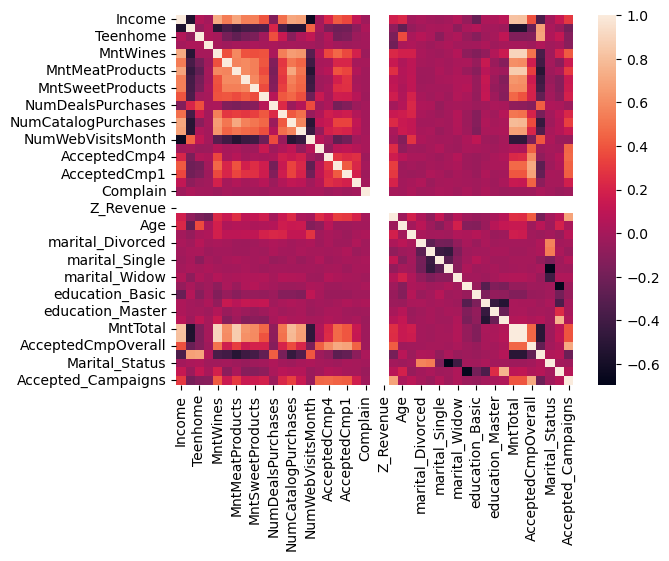

In [97]:
sns.heatmap(food.corr(method ='pearson', numeric_only=True))

<Axes: >

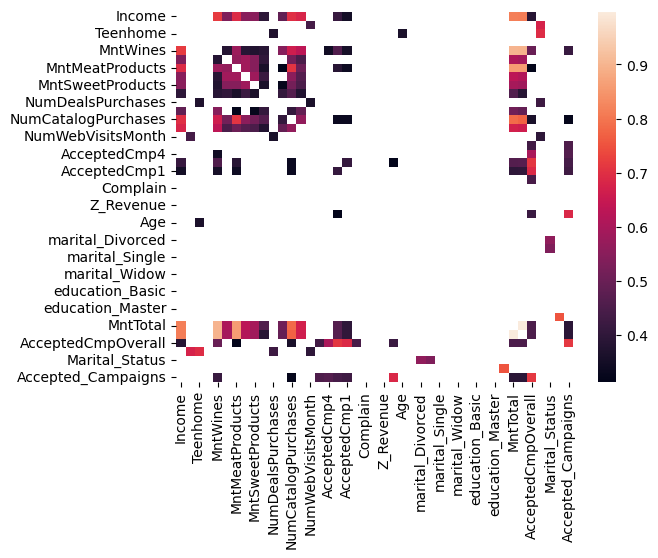

In [98]:
all_correlations = food.corr(method ='pearson', numeric_only=True)
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]

sns.heatmap(all_correlations)

In [99]:
all_correlations['Accepted_Campaigns']

Income                       NaN
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.416651
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.322143
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.453742
AcceptedCmp4            0.465985
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.685109
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

### Data Analysis

In [100]:
age_groups = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")

food['Age_Group'] = food['Age'].apply(assign_age_group)

In [64]:
food[['Age','Age_Group']].head()

,Age,Age_Group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

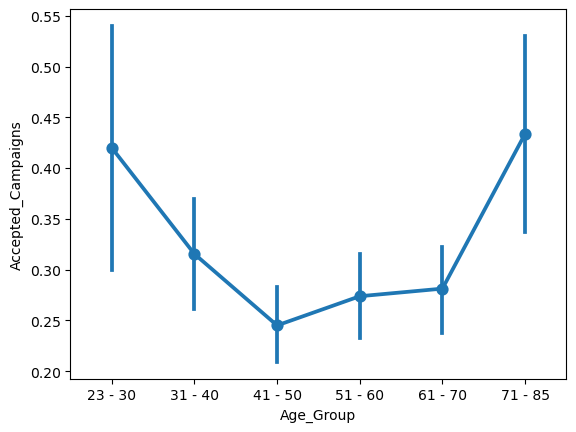

In [101]:
age_order = ['23 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 85']

sns.pointplot(data = food, x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order)

In [159]:
counts = food['Age_Group'].value_counts()
percentage = counts / food.shape[0]

percent_food = percentage.reset_index()
percent_food.columns = ['Age_Group','percentage']
percent_food = percent_food.sort_values('Age_Group')
percent_food

,Age_Group,percentage
5,23 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


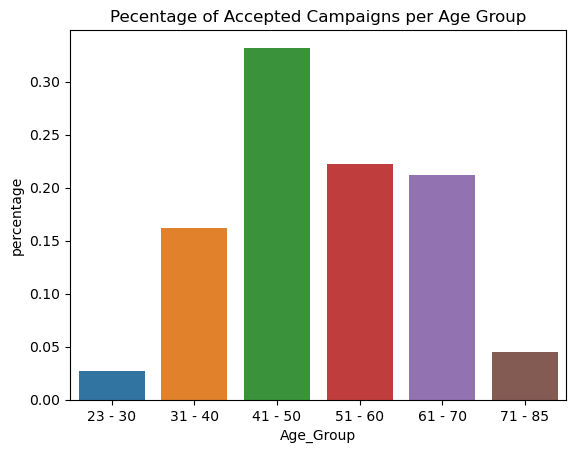

In [104]:
sns.barplot(x = 'Age_Group', y = 'percentage',hue='Age_Group', data =percent_food)
plt.title('Pecentage of Accepted Campaigns per Age Group')
plt.show()

In [105]:
# Age Segmentation - core audience for accepting campaigns right now is 31 - 70
food.groupby('Age_Group')['MntTotal'].sum().reset_index()

,Age_Group,MntTotal
0,23 - 30,40166
1,31 - 40,135044
2,41 - 50,297347
3,51 - 60,242313
4,61 - 70,249793
5,71 - 85,76828


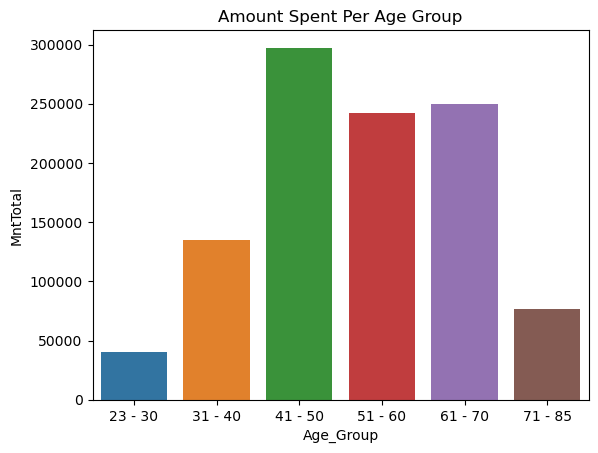

In [106]:
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal',hue= 'Age_Group', data =grouped_food)
plt.title('Amount Spent Per Age Group')
plt.show()

In [131]:
acct_camp = food[food['Accepted_Campaigns'] != 0]
acct_grouped_food = acct_camp.groupby('Age_Group')['MntTotal'].sum().reset_index()
acct_grouped_food

,Age_Group,MntTotal
0,23 - 30,25917
1,31 - 40,83939
2,41 - 50,119793
3,51 - 60,102519
4,61 - 70,106094
5,71 - 85,46307


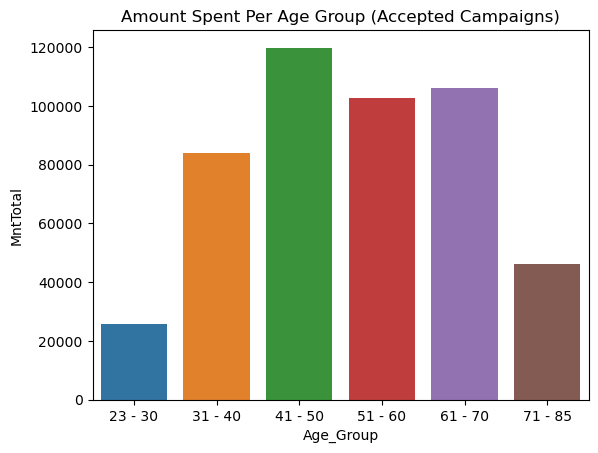

In [161]:
sns.barplot(x = 'Age_Group', y = 'MntTotal', hue= 'Age_Group', data =acct_grouped_food)
plt.title('Amount Spent Per Age Group (Accepted Campaigns)')
plt.show()

In [113]:
sum_food = pd.DataFrame(food[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sums'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)
sum_food

,Type_of_Purchase,Sums
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


<Axes: xlabel='Type_of_Purchase', ylabel='Sums'>

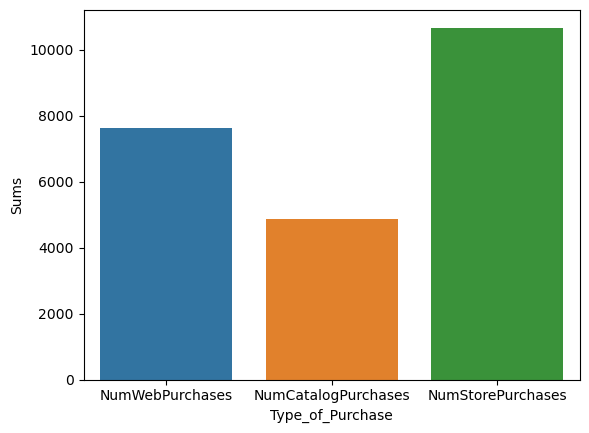

In [115]:
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', hue= 'Type_of_Purchase', data = sum_food)

In [116]:
acct_camp = food[food['Accepted_Campaigns'] != 0]

sum_food = pd.DataFrame(acct_camp[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sums'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)
sum_food

,Type_of_Purchase,Sums
0,NumWebPurchases,2672
1,NumCatalogPurchases,2131
2,NumStorePurchases,3417


<Axes: xlabel='Type_of_Purchase', ylabel='Sums'>

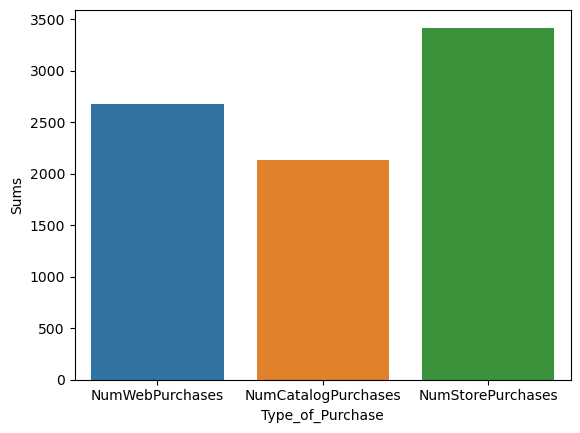

In [118]:
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', hue= 'Type_of_Purchase', data = sum_food)

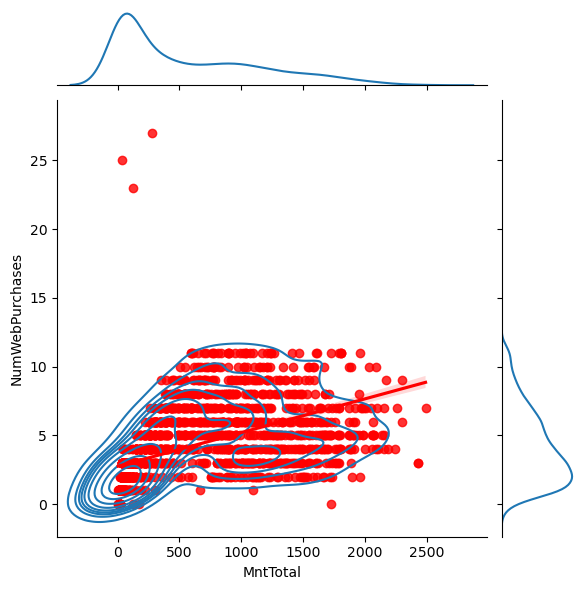

In [119]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = "kde")
x.plot_joint(sns.regplot, color = 'r')

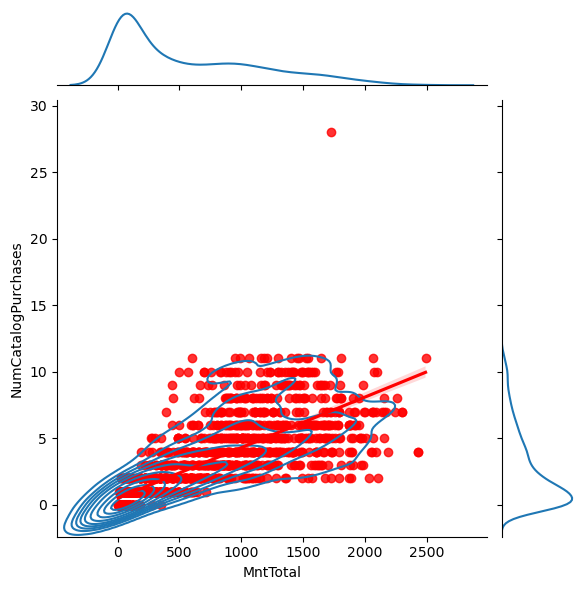

In [120]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = "kde")
x.plot_joint(sns.regplot, color = 'r')

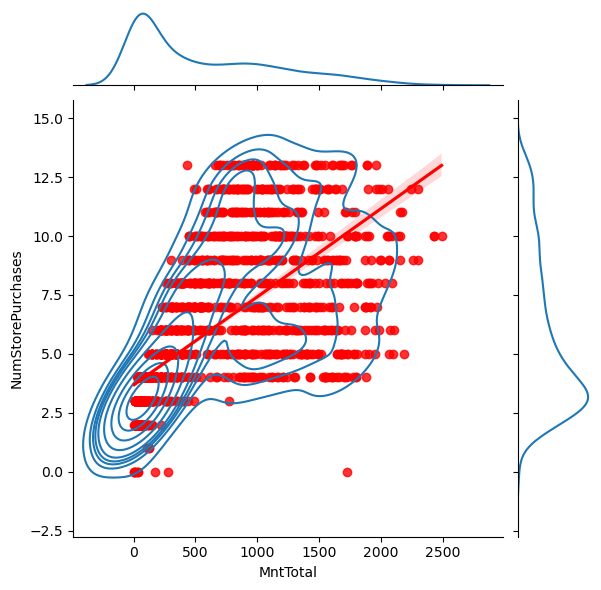

In [121]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = "kde")
x.plot_joint(sns.regplot, color = 'r')

In [ ]:
# 2 directions: Boost up the higher percentage catalog customers. OR Focus on In Store/Web because they have more traffic.

<Axes: xlabel='Total_Children', ylabel='Accepted_Campaigns'>

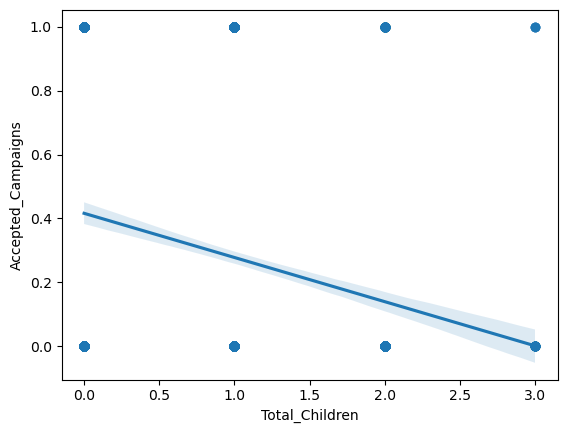

In [122]:
sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = food)

In [ ]:
# Less kids = More likely to accept campaign

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

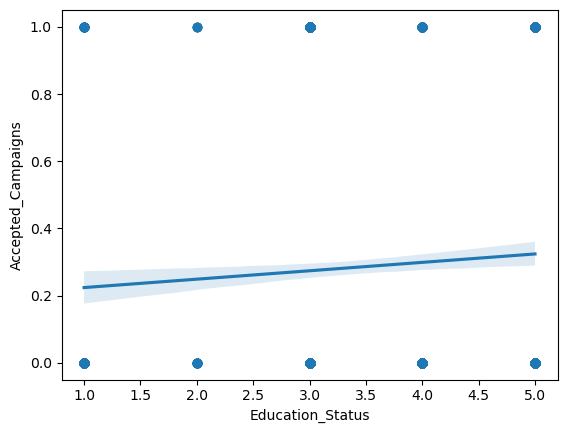

In [123]:
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food)

<Axes: xlabel='Education_Status_str', ylabel='MntTotal'>

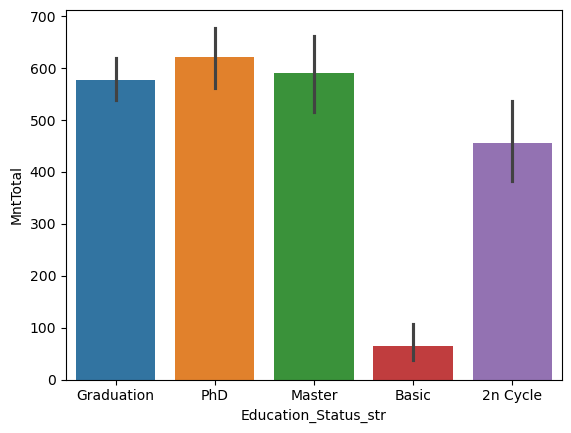

In [158]:
# sns.regplot(x = 'Education_Status', y = 'MntTotal', data = food)
sns.barplot(x= 'Education_Status_str', y = 'MntTotal',hue = 'Education_Status_str' , data = food)

In [ ]:
# Education isn't really significant in our segmentation

<Axes: xlabel='Marital_Status_str', ylabel='count'>

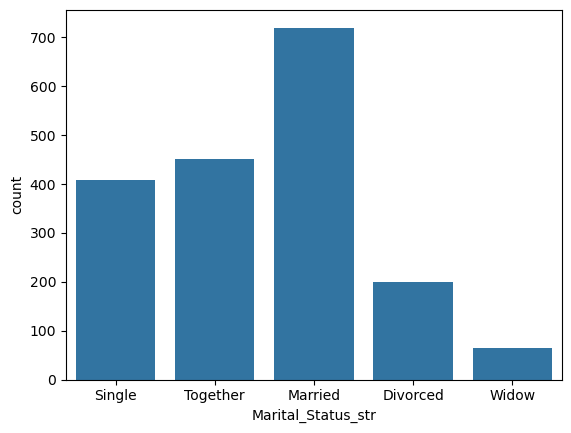

In [135]:
sns.countplot(x = 'Marital_Status_str', data = food)

In [127]:
# sns.regplot(x = 'Marital_Status', y = 'Accepted_Campaigns', data = food)

In [128]:
accpt = food[food['Accepted_Campaigns'] != 0]
rel_food = accpt.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()
rel_food

,Marital_Status_str,MntTotal
0,Divorced,51731
1,Married,174300
2,Single,121036
3,Together,113856
4,Widow,23646


<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

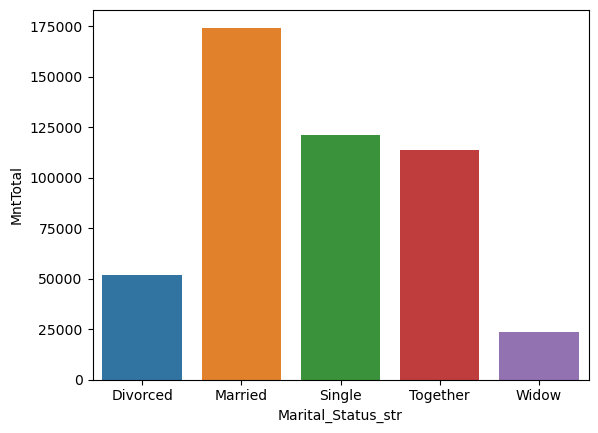

In [136]:
sns.barplot(x= 'Marital_Status_str', y = 'MntTotal',hue = 'Marital_Status_str' , data = rel_food)

<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

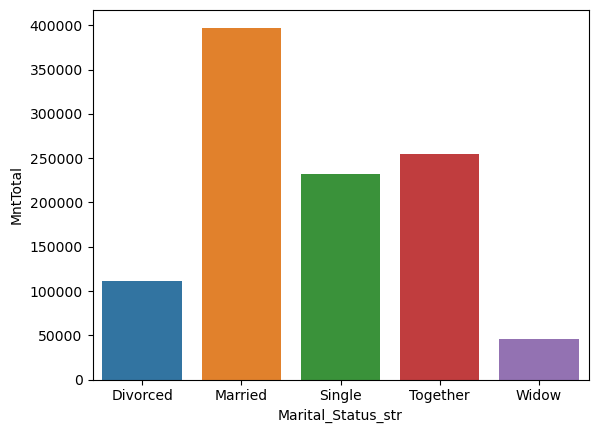

In [137]:
rel_food2 = food.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()
rel_food
sns.barplot(x= 'Marital_Status_str', y = 'MntTotal',hue = 'Marital_Status_str',  data = rel_food2)

In [139]:
total = food['Marital_Status_str'].value_counts()
total

Marital_Status_str
Married     720
Together    451
Single      409
Divorced    199
Widow        64
Name: count, dtype: int64

In [140]:
accepted = food[food['Accepted_Campaigns'] == 1]['Marital_Status_str'].value_counts()
accepted

Marital_Status_str
Married     188
Single      134
Together    120
Divorced     57
Widow        24
Name: count, dtype: int64

In [141]:
percent_marital = accepted / total * 100
percent_marital

Marital_Status_str
Divorced    28.643216
Married     26.111111
Single      32.762836
Together    26.607539
Widow       37.500000
Name: count, dtype: float64

In [142]:
percent_food = percent_marital.reset_index()
percent_food.columns = ['Marital_Status', 'Percentage']
percent_food

,Marital_Status,Percentage
0,Divorced,28.643216
1,Married,26.111111
2,Single,32.762836
3,Together,26.607539
4,Widow,37.500000


<Axes: xlabel='Marital_Status', ylabel='Percentage'>

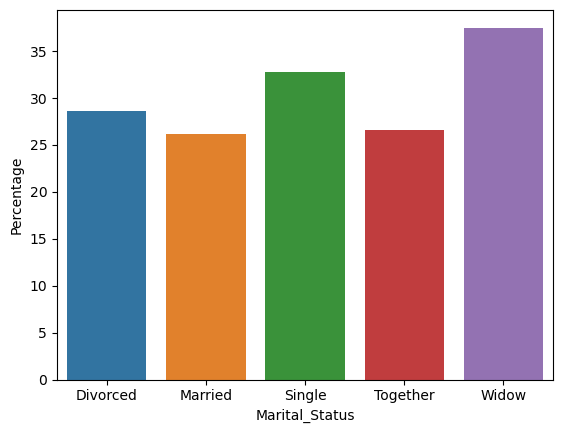

In [145]:
sns.barplot(x= 'Marital_Status', y = 'Percentage',hue = 'Marital_Status', data = percent_food)

In [ ]:
# Marriage - Married, single, together are spending a lot more money than widow and divorced. We should focus on this segment.

## OVERALL FINDINGS

1. Age - 30-70 Were spending more money, but less likely to accept campaigns. Higher volume here though.
2. Catalog was more likely to accpt campaigns, but in person spend more. Recommend a split between all.
- 40% catalog, 30 store, 30 web
3. Focus on people with no kids (or less kids).
4. Education - no impact - don't target any group
5. Marital Status - doesn't play a big part. Married, Single, Together, spend more money

### Money Making
1. Middle Aged People, high earners, with no kids. Target on different platforms with split above.

### New Users to Spend Money
2. Focus on 21-30, 70 and up - who statistically accepted campaigns at a higher rate.

